### Questions

<a href="https://www.kaggle.com/mysarahmadbhat/lung-cancer">Source</a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Chunna\Documents\Data_Analyst_Portfolio\survey_lung_cancer.csv', low_memory=False)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
# Add age distribution column
def AD(row):
    if row['AGE'] >= 21 and row['AGE'] <= 30:
        val = '21-30'
    elif row['AGE'] >= 31 and row['AGE'] <= 40:
        val = '31-40'
    elif row['AGE'] >= 41 and row['AGE'] <= 50:
        val = '41-50'
    elif row['AGE'] >= 51 and row['AGE'] <= 60:
        val = '51-60'
    elif row['AGE'] >= 61 and row['AGE'] <= 70:
        val = '61-70'
    elif row['AGE'] >= 71 and row['AGE'] <= 80:
        val = '71-80'
    elif row['AGE'] >= 81 and row['AGE'] <= 90:
        val = '81+'
    return val

df['AGE_DISTRIBUTION'] = df.apply(AD, axis=1)


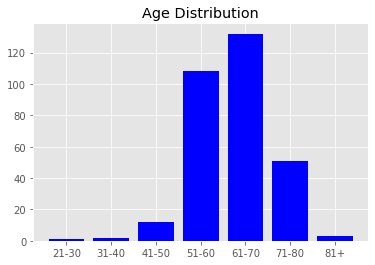

In [6]:
# Pie chart of age distribution of patients
count_age = df['AGE_DISTRIBUTION'].value_counts().reset_index().sort_values(['index'],ascending=True)
labels = count_age.iloc[:,0].to_numpy()
values = count_age.iloc[:,1].to_numpy()


plt.style.use('ggplot')
x = [i for i, _ in enumerate(labels)]
plt.bar(labels,values,color='blue')
plt.xticks(x,labels)
plt.title('Age Distribution')


plt.show()




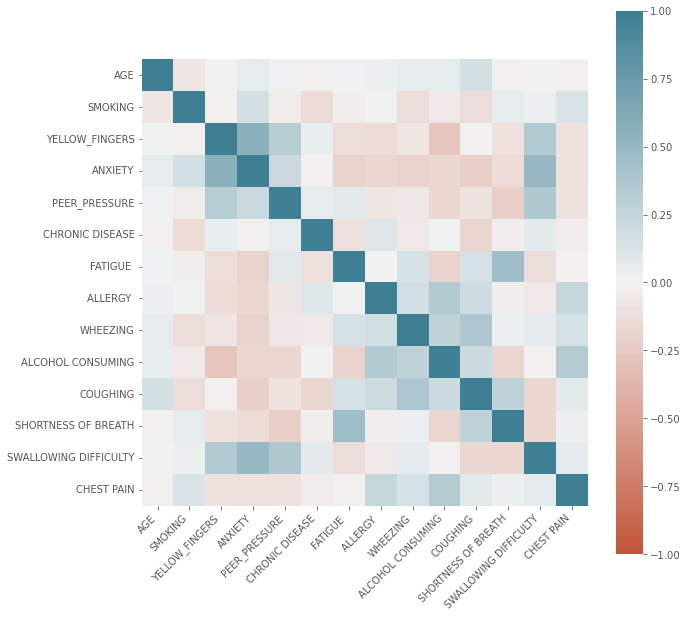

In [7]:
corr = df.corr()

plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);



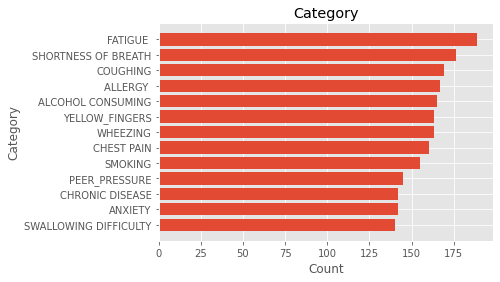

In [8]:
cancer = df[df['LUNG_CANCER']=='YES']
cancer_category = cancer[cancer.columns.difference(['GENDER','AGE','LUNG_CANCER','AGE_DISTRIBUTION'])]
#test = cancer[cancer['SMOKING']==2].shape[0]
values=[]

# Loop through number of rows for each category equals 2
for val in cancer_category:
    values.append(int(cancer_category[cancer_category[val]==2].shape[0]))

# Append columns to a list
labels = cancer_category.columns.values.tolist()

category = {'category':labels,'count':values}
category = pd.DataFrame(category).sort_values(['count'],ascending=True)

labels = category.iloc[:,0].to_numpy()
values = category.iloc[:,1].to_numpy()


plt.barh(labels,values)
plt.title('Category')
plt.ylabel('Category')
plt.xlabel('Count')
plt.show()


    


In [264]:
#Gender Analysis

# labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
# fracs = [15, 30, 45, 10]

# fig = plt.figure()

# ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
# ax1.pie(fracs, labels=labels, radius = 1.2)
# # ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
# # ax2.pie(fracs, labels=labels, radius = 1.2)
# plt.show()  

data = pd.DataFrame()
for column in cancer.columns.difference(['GENDER','AGE','LUNG_CANCER','AGE_DISTRIBUTION']): 
    x = cancer[cancer[column]==2]['GENDER'].value_counts().reset_index().sort_values(by=['index']).rename(columns={'index':'GENDER','GENDER':column})
    x = x.transpose()
    x = x.iloc[1:,:]
    x = x.set_axis(['Female', 'Male'], axis='columns')
    x
  
# fig = plt.figure()

# for i, column in enumerate(cancer.columns.difference(['GENDER','AGE','LUNG_CANCER','AGE_DISTRIBUTION'])): 
#     column = cancer[cancer[column]==2]['GENDER'].value_counts().reset_index().sort_values(by=['index'])
#     values = column.iloc[:,1].to_numpy()
#     labels = column.iloc[:,0].to_numpy()
#     l = 10*i
#     ax = fig.add_axes([l, 0, .5, .5], aspect=1)
#     ax.pie(values, labels=labels, radius=30)

# ax.set_title('column')
# plt.show()




In [101]:
#Smoker by Gender
# smoker = df[df['SMOKING']==2]['GENDER'].value_counts()
# non_smoker = df[df['SMOKING']==1]['GENDER'].value_counts()
# labels = ['Smoker', '']

# x = np.arange(len(labels))
# width = 0.5
# fig, ax = plt.subplots()
# rects1 = ax.bar(x-width,female,width,label='Female')
# rects2 = ax.bar(x-width/12,male,width,label='Male')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# fig.tight_layout()
# plt.show()

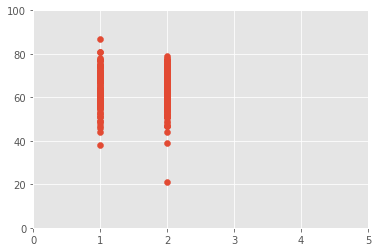

In [11]:
x = df['SMOKING']
y = df['AGE']
plt.xlim(0, 5)
plt.ylim(0, 100)
plt.scatter(x,y)
plt.show()